# Математическая статистика
## Практическое задание 0

В данном задании предлагается решить 4 простых задачи на использование функций библиотеки `numpy`. Хоть само задание и не относится к курсу статистики, оно является важным в условиях отсутствия курса по Питону. Решение этих задач поможет научить писать простой и понятный код, работающий при этом в десятки или даже в сотни раз быстрее. Нам же это облегчит процесс проверки.

**Правила:**

* Задание считается выполненным, если решено *не менее трех задач*.
* Успешное выполнение задание является допуском для выполнения следующих практических заданий.
* В случае неуспешного выполнения задания допускаются две попытки повторной сдачи. Мы будем стараться отвечать в течении трех дней.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 0"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `0.N.ipynb` и `0.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* В данном задании весь присылаемый код должен корректно работать на `Python 3.5`.


Во всех заданиях предполагается, что все аргументы функций, которые нужно реализовать, имеют тип `numpy.array` либо являются числами. Возвращать нужно также либо `numpy.array`, либо число. Кроме того, предполагается, что все аргументы корректны, и проверять их на корректность не нужно.

При реализации запрещается пользоваться любыми циклами, в том числе стандартными функциями языка, которые заменяют циклы. Можно использовать любые функции библиотек `numpy` или `scipy`, кроме функции `numpy.fromfunction` и декторатора `numpy.vectorize`.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение (`numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`). *Авторское решение занимает одну строчку.*

In [2]:
def matrix_multiplication(A, B):    
    Subsidinady_m_for_mult_B = np.tile(B.transpose(), (1, A.shape[0])).reshape(B.shape[1], A.shape[0], A.shape[1])
    Subsidinady_m_for_mult_A = np.tile(A, (B.shape[1],1, 1))
    return ( Subsidinady_m_for_mult_A *  Subsidinady_m_for_mult_B).sum(2).transpose()

Проверьте правильность реализации на случайных матрицах. Должен получится ноль.

In [3]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

1.3145040611561853e-13

А вот в таком стиле вы присылали бы нам свои работы, если не стали бы делать это задание.

In [4]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код должен работать почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [5]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)

CPU times: user 100 ms, sys: 64 ms, total: 164 ms
Wall time: 166 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.13 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.65 ms
CPU times: user 17.4 s, sys: 28 ms, total: 17.4 s
Wall time: 17.3 s


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [6]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], ('Матрицы размерностей '
                                      '{} и {} неперемножаемы'.format(A.shape,
                                                                      B.shape))
    
    Subsidinady_m_for_mult_B = np.tile(B.transpose(), (1, A.shape[0])).reshape(B.shape[1], A.shape[0], A.shape[1])
    Subsidinady_m_for_mult_A = np.tile(A, (B.shape[1],1, 1))
    C = ( Subsidinady_m_for_mult_A *  Subsidinady_m_for_mult_B).sum(2).transpose()
    
    return C

**Задача 2.** Напишите функцию, которая по входной последовательности $X = (X_1, ..., X_n)$ строит последовательность $S = (S_1, ..., S_n)$, где $S_k = \frac{X_1 + ... + X_k}{k}$.  *Авторское решение занимает одну строчку.*

In [7]:
def cumavg(X):
     return X.cumsum() / np.arange(1, len(X) + 1)

Постройте график зависимости $S_k$ от $k$. График должен быть в виде ломанной линии с достаточно крупными точками. Размер фигуры 15 на 5, сетка в виде пунктирной линии.

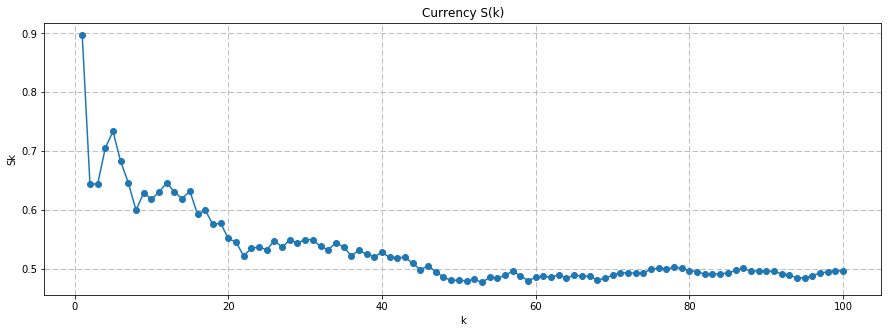

In [8]:
S = cumavg(sps.uniform.rvs(size=100))

plt.figure(figsize = (15, 5)) # установили размеры фигуры
plt.plot(range(1, len(S) + 1), S, '-o') 
plt.title('Currency S(k)') 
plt.xlabel('k') 
plt.ylabel('Sk') 
plt.grid(linestyle = 'dashed')
plt.show()

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать в 50 раз быстрее.

In [9]:
def stupid_cumavg(X):
    S = [0 for i in range(len(X))]
    for i in range(len(X)):
        S[i] = X[i] + S[i - 1]
    for i in range(len(X)):
        S[i] /= i + 1
    return S

X = sps.uniform.rvs(size=10 ** 7)

%time S1 = cumavg(X)
%time S2 = stupid_cumavg(X)

np.abs(S1 - S2).sum()

CPU times: user 68 ms, sys: 24 ms, total: 92 ms
Wall time: 94.4 ms
CPU times: user 6.16 s, sys: 36 ms, total: 6.2 s
Wall time: 6.19 s


0.0

**Задача 3.** Дана матрица $A = (a_{ij})$ размера $n \times m$. Вычислите величину $$\frac{1}{m} \sum_{j=1}^m \min_{i=1, ..., n} a_{ij},$$ то есть средний минимум по столбцам. *Авторское решение занимает одну строчку.*

In [11]:
def avgmin(A):
    return  A.min(0).mean()

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать почти в 200 раз быстрее. Обратите внимание, что разность чисел может быть не равна нулю из-за ошибок округления, но должна иметь малый порядок.

In [12]:
def stupid_avgmin(A):
    N, M = len(A), len(A[0])
    min_col = [min([A[i][j] for i in range(N)]) for j in range(M)]
    return sum(min_col) / M

N, M = 5000, 10000
A = sps.uniform.rvs(size=(N, M))

%time S1 = avgmin(A)
%time S2 = stupid_avgmin(A)

print(np.abs(S1 - S2))

CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 51.1 ms
CPU times: user 15.3 s, sys: 8 ms, total: 15.3 s
Wall time: 15.3 s
1.35525271561e-19


**Задача 4.** Дан массив $X$. Требуется построить новый массив, в котором все четные элементы $X$ заменить на число $v$ (если оно не указано, то на ноль). Все нечетные элементы исходного массива нужно возвести в квадрат и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений.

In [13]:
def func4(X, v=0):
    odd_numb = 1 & X
    even_numb = v
    odd_numb = odd_numb * X * X
    odd_numb[odd_numb.nonzero()] = odd_numb[odd_numb.nonzero()][::-1]
    return even_numb | odd_numb

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать в 20 раз быстрее.

In [14]:
def stupid_func4(X, v=0):
    odd = [elem ** 2 for elem in X if elem % 2]
    
    new_X = []
    j = len(odd) - 1
    for i in range(len(X)):
        if X[i] % 2:
            new_X.append(odd[j])
            j -= 1
        else:
            new_X.append(v)
    
    return new_X

X = sps.randint.rvs(size=10 ** 7, low=0, high=100)

%time A1 = func4(X)
%time A2 = stupid_func4(X)

np.abs(A1 - A2).sum()

CPU times: user 340 ms, sys: 36 ms, total: 376 ms
Wall time: 378 ms
CPU times: user 8.77 s, sys: 88 ms, total: 8.86 s
Wall time: 8.86 s


0

**Вопрос:** За счет чего достигается такая эффективность методов `numpy`?

**Ответ:** массив numpy расположен в ячейках памяти последовательно, многие его методы написаны на компилируемых языках. Математические алгоритмы, реализованные на интерпретируемых языках (например, Python), часто работают гораздо медленнее тех же алгоритмов, реализованных на компилируемых языках (например, Фортран, Си, Java). Пакет numpy содержит реализации функций и операторов(мат. алгоритмы), оптимизированные для работы с многомерными массивами. В результате любой алгоритм, который может быть выражен в виде последовательности операций над массивами (матрицами) и реализованный с использованием numpy, работает так же быстро, как эквивалентный код, выполняемый в MATLAB[1].